# Bifurcations on the real line

A **Bifurcation** is the change in a qualitative change in a dynamical system as its paremeters change

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
def graph_bifurcation_diafram(r, r_select, xmin, xmax):
    pass

In [4]:
def r(x): return -x ** 2

The bifurcation points of $\dot x = f(x, r) = f_r(x)$ occur when
1. there are changes of stability for the set of fixed points, and
2. the potential local changes of stability of the fixed point

That is, the bifurcation points of $\dot x = f(x, r) = f_r(x)$ occur when
1. $f_r(x) = 0$
2. $f'_r(x) = 0$

## Bifurcation Diagram

> A bifurcation diagram for a system on the real line is a graph in the $xr$-plane representing the varying pattern of fixed points for the system $\dot x = f_r(x)$ and their stabilities

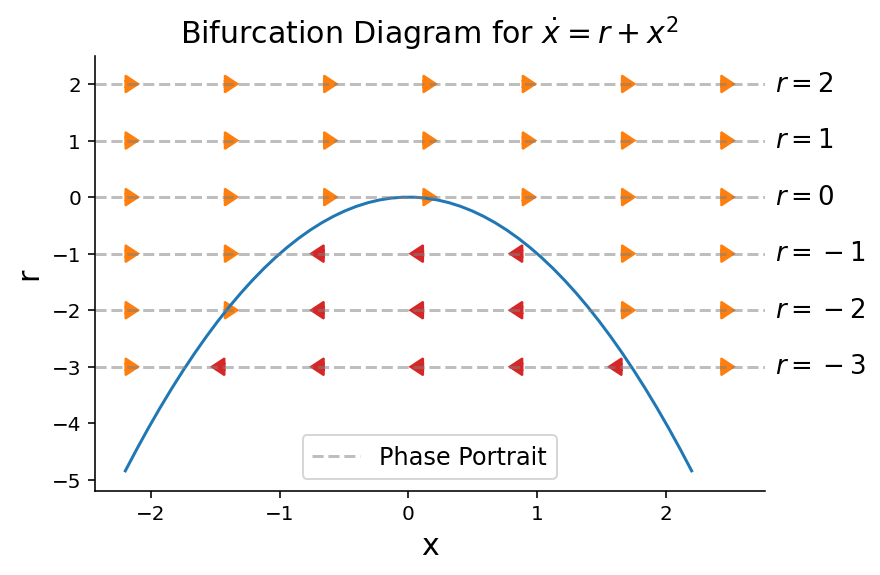

In [50]:
r_select = [-3, -2, -1, 0, 1, 2]
xmin, xmax = -2.2, 2.2
x = np.linspace(xmin, xmax)
n_arrows = 7
step = (xmax - xmin + 1) / n_arrows
arrow_points = xmin + step * np.arange(n_arrows)

fig, ax = plt.subplots()
ax.plot(x, r(x))
for ri in r_select:
    line = ax.axhline(y=ri, c="tab:gray", linestyle="--", alpha=0.5)
    fxr = arrow_points ** 2 + ri
    for xval, rval in zip(arrow_points, fxr):
        position = np.sign(rval)
        if position != 0:
            color = "tab:orange" if position == 1 else "tab:red"
            plt.arrow(xval, ri, position * 0.001,
                      0, width=0.1, head_width=0.3,
                      color=color, head_length=0.1)

xg_min, xg_max = ax.get_xlim()
for ri in r_select:
    ax.text(xg_max * 1.03, ri, f"$r={ri}$", fontsize=13,
             horizontalalignment="left",
             verticalalignment="center")

ax.legend([line], ["Phase Portrait"], fontsize=12)    
ax.set_title(r"Bifurcation Diagram for $\dot x= r + x^2$", fontsize=15)
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("r", fontsize=15);

## A second example

In [16]:
def f(x, r): return r - x - np.exp(-x)

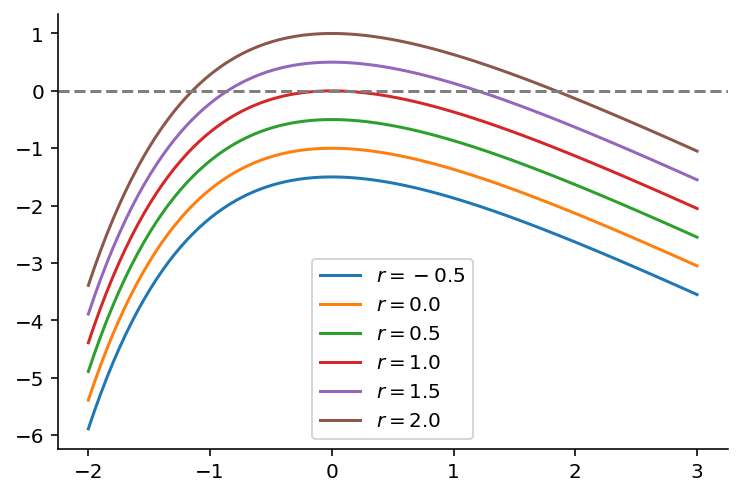

In [28]:
xrange = np.linspace(-2, 3, 100)
rvalues = np.arange(-0.5, 2.5, 0.5)
for r in rvalues:
    plt.plot(xrange, f(xrange, r), label=f"$r={r}$")
plt.axhline(y=0, c="tab:gray", linestyle="--")
plt.legend(fontsize=10)

In [6]:
r = 2
x = -0.1

In [7]:
x = -1.1
for _ in range(100):
    y = np.exp(-x)
    x = r - y
    

(x, y)

(1.8414056604369606, 0.15859433956303937)

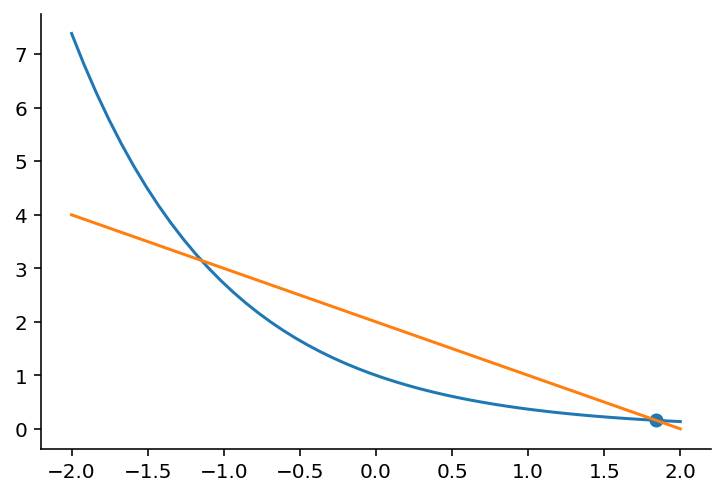

In [200]:
xrange = np.linspace(-2, 2)
plt.plot(xrange, np.exp(-xrange))
plt.plot(xrange, r - xrange)
plt.scatter(x, y)